In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Arquivo com os valores de medição do drone
file = r"C:\Users\lucas\Documents\Controle Digital\trabalho controle digital und3\tanques\DADOS_TANQUE_CONV.xlsx"
df = pd.read_excel(file)
df.head()

C:\Users\lucas\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Sparkline Group extension is not supported and will be removed
  for idx, row in parser.parse():


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Over:,1.5,Limite,+-:,0.5,ALT2:,0.04,10,NaN,MV:,1.61,CONTADOR: 69
1,Over:,1.5,Limite,+-:,0.5,ALT2:,0.06,10,NaN,MV:,1.63,CONTADOR: 70
2,Over:,1.5,Limite,+-:,0.5,ALT2:,0.05,10,NaN,MV:,1.65,CONTADOR: 71
3,Over:,1.5,Limite,+-:,0.5,ALT2:,0.14,10,NaN,MV:,1.60,CONTADOR: 72
4,Over:,1.5,Limite,+-:,0.5,ALT2:,0.07,10,NaN,MV:,1.67,CONTADOR: 73


In [3]:
# Ajustando os dados
df = df.rename(columns={'Unnamed: 11': 'Contador'})
df = df.rename(columns={'Unnamed: 10': 'PID'})
df = df.rename(columns={'Unnamed: 7': 'SetPoint'})
df = df.rename(columns={'Unnamed: 6': 'Nivel'})
df = df.rename(columns={'Unnamed: 4': 'Limite'})
df = df.rename(columns={'Unnamed: 1': 'Overshoot'})
display(df)

,Unnamed: 0,Overshoot,Unnamed: 2,Unnamed: 3,Limite,Unnamed: 5,Nivel,SetPoint,Unnamed: 8,Unnamed: 9,PID,Contador
0,Over:,1.5,Limite,+-:,0.5,ALT2:,0.04,10,NaN,MV:,1.61,CONTADOR: 69
1,Over:,1.5,Limite,+-:,0.5,ALT2:,0.06,10,NaN,MV:,1.63,CONTADOR: 70
2,Over:,1.5,Limite,+-:,0.5,ALT2:,0.05,10,NaN,MV:,1.65,CONTADOR: 71
3,Over:,1.5,Limite,+-:,0.5,ALT2:,0.14,10,NaN,MV:,1.60,CONTADOR: 72
4,Over:,1.5,Limite,+-:,0.5,ALT2:,0.07,10,NaN,MV:,1.67,CONTADOR: 73
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,Over:,0.5,Limite,+-:,0.8,ALT2:,15.13,15,NaN,MV:,1.75,CONTADOR: 7496
7428,Over:,0.5,Limite,+-:,0.8,ALT2:,15.11,15,NaN,MV:,1.79,CONTADOR: 7497
7429,Over:,0.5,Limite,+-:,0.8,ALT2:,15.09,15,NaN,MV:,1.79,CONTADOR: 7498
7430,Over:,0.5,Limite,+-:,0.8,ALT2:,15.08,15,NaN,MV:,1.78,CONTADOR: 7499


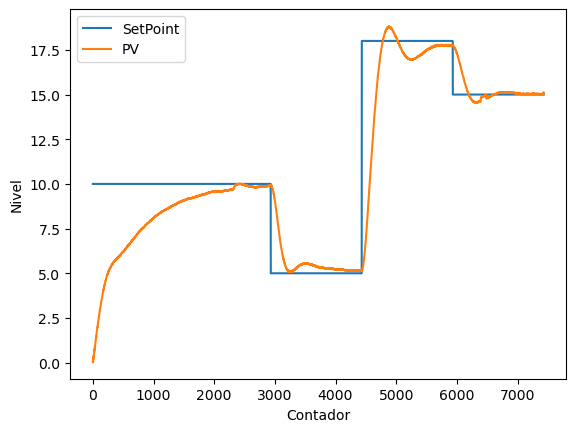

In [4]:
# Seleciona as colunas 'SetPoint' e 'Ângulo'
subset_df = df[['SetPoint', 'Nivel']]

# Plota as colunas
plt.plot(subset_df.index, subset_df['SetPoint'], label='SetPoint')
plt.plot(subset_df.index, subset_df['Nivel'], label='PV')

# Adiciona rótulos e legenda
plt.xlabel('Contador')
plt.ylabel('Nivel')
plt.legend()

# Exibe o gráfico
plt.show()


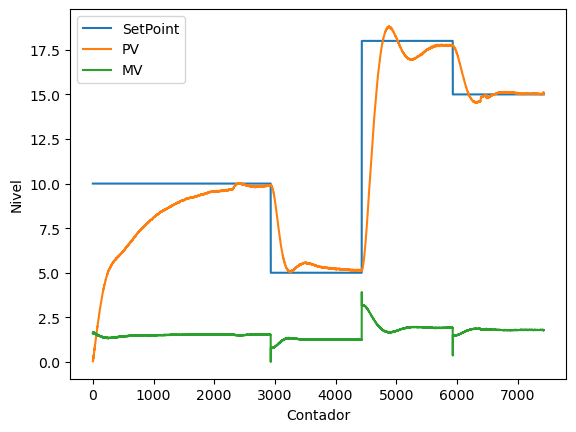

In [34]:
# Suponha que 'df' seja o seu DataFrame

# Seleciona as colunas 'SetPoint' e 'Ângulo'
subset_df = df[['SetPoint', 'Nivel', 'PID']]

# Plota as colunas
plt.plot(subset_df.index, subset_df['SetPoint'], label='SetPoint')
plt.plot(subset_df.index, subset_df['Nivel'], label='PV')
plt.plot(subset_df.index, subset_df['PID'], label='MV')

# Adiciona rótulos e legenda
plt.xlabel('Contador')
plt.ylabel('Nivel')
plt.legend()

# Exibe o gráfico
plt.show()


In [55]:
# Arquivo da calibração
file2 = r"C:\Users\lucas\Documents\Controle Digital\trabalho controle digital und3\tanques\dadotanques.xlsx"
df2 = pd.read_excel(file2)
df2.head()

,bit,nivel
0,901,29.5
1,850,28.0
2,815,27.0
3,755,25.0
4,664,22.0


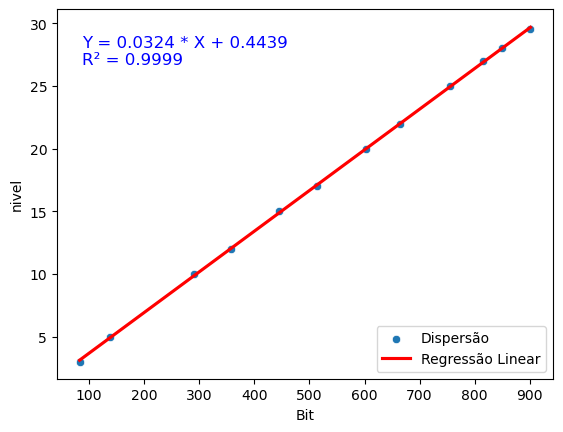

In [56]:
# Plotando o gráfico de dispersão
sns.scatterplot(x='bit', y='nivel', data=df2, label='Dispersão')

# Adicionando a função de regressão linear
sns.regplot(x='bit', y='nivel', data=df2, scatter=False, color='red', label='Regressão Linear')

# Calculando a regressão linear
coefficients = np.polyfit(df2['bit'], df2['nivel'], 1)
equation = f'Y = {coefficients[0]:.4f} * X + {coefficients[1]:.4f}'

# Calculando o R²
y_pred = coefficients[0] * df2['bit'] + coefficients[1]
r_squared = 1 - (sum((df2['nivel'] - y_pred)**2) / ((len(df2)-1) * np.var(df2['nivel'], ddof=1)))
r_squared = round(r_squared, 4)

# Adicionando a equação e o R² ao gráfico
plt.annotate(f'{equation}\nR² = {r_squared}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='blue')

# Adicionando rótulos e legendas
plt.xlabel('Bit')
plt.ylabel('nivel')
plt.legend(loc='lower right')

# Exibindo o gráfico
plt.show()


In [62]:
# Calcular a diferença entre Nivel e SetPoint
df['Erro'] = df['Nivel'] - df['SetPoint']

# Calcular o MSE
mse = np.mean(df['Erro']**2) / len(df)  # Divide pelo número de amostras

print(f'O MSE - PID Convencional: {mse:.5f}')

O MSE - PID Convencional: 0.00084
